# Preamble

In [1]:
import pandas as pd
import os
#os.listdir()
df = pd.read_csv('GDP_all.csv')
df.head(3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,_Institutional,industry,OBJECTID
0,273355,264883,271957,276448,295811,309034,316837,303803,295852,"Corporations, non-profit institutions and hous...",Agriculture and forestry,0
1,6532,5119,4765,5246,5751,6249,6181,5363,5759,"Corporations, non-profit institutions and hous...",Fishing,1
2,4915,5036,5213,5195,5334,5554,6272,6453,6179,"Corporations, non-profit institutions and hous...",Mining and quarrying,2


# Matplotlib

In [2]:
subset = df[['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','industry']]
subset_melt = subset.melt(id_vars="industry")
subset_melt

,industry,variable,value
0,Agriculture and forestry,2001,273355
1,Fishing,2001,6532
2,Mining and quarrying,2001,4915
3,Manufacturing,2001,99777
4,Electricity and water supply,2001,18158
...,...,...,...
265,Health and social work,2009,11741
266,Other services,2009,2626
267,Total value added at basic prices,2009,152117
268,Taxes less subsidies on products,2009,197187


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


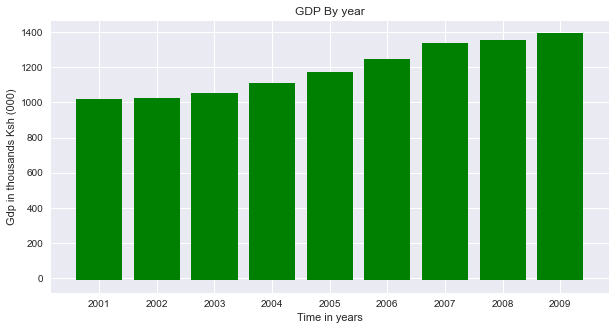

In [5]:
summed = subset_melt.groupby(["industry","variable"]).sum().reset_index()
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use("seaborn")
plt.figure(figsize = (10,5))
plt.bar(summed["variable"], summed["value"]/1000,color ="green")
plt.title("GDP By year")
plt.ylabel("Gdp in thousands Ksh (000)")
plt.xlabel("Time in years")
plt.show()

# Seaborn

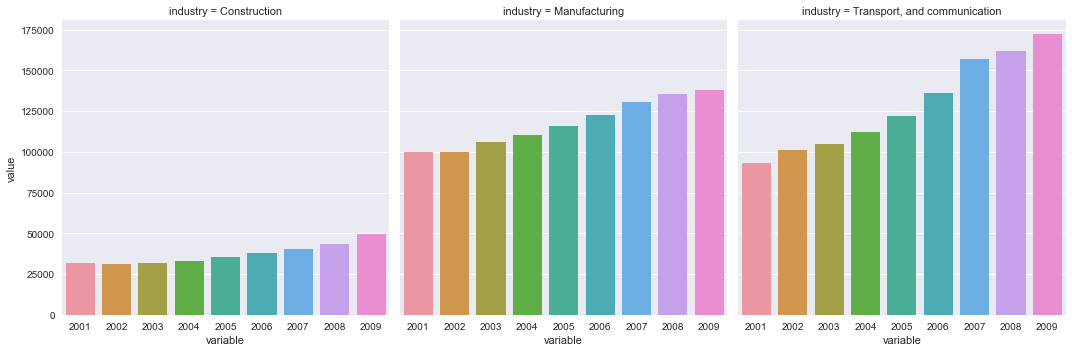

In [6]:
import seaborn as sns
some_sectors = ['Manufacturing','Construction','Transport, and communication']
filter_sector = summed.industry.isin(some_sectors) # create a filter for 3 sectors to investigate
three_sectors = summed[filter_sector]

sns.catplot(data = three_sectors,x = "variable",y = "value",kind="bar",col = "industry")

# Pandas Plots

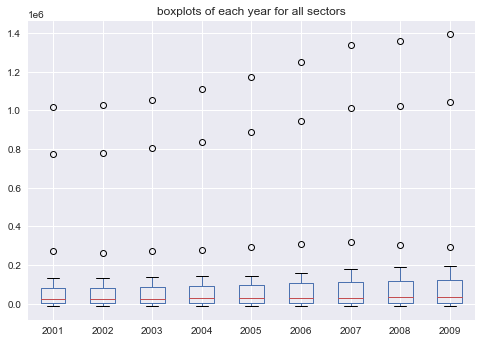

In [79]:
df[['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']].plot(kind ="box",
                                                                                title = "boxplots of each year for all sectors")

# Grammar of Graphics

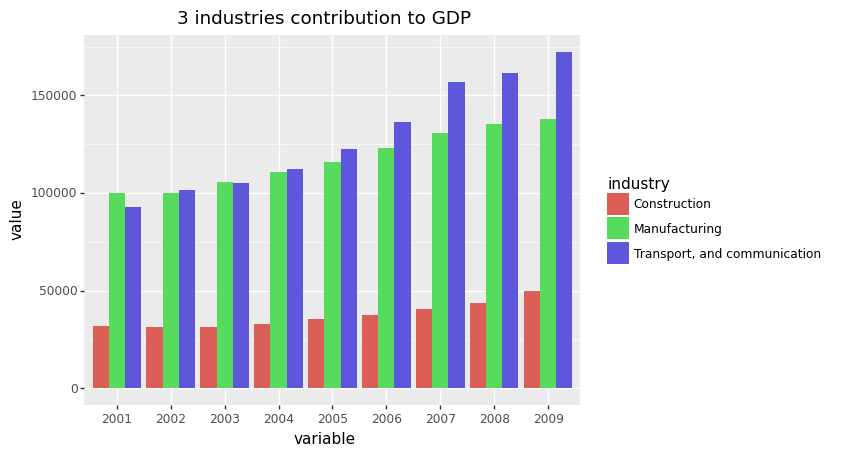

<ggplot: (169246090728)>

In [89]:
#pip install plotnine 
from plotnine import *
(ggplot(three_sectors,                                         # layer (data)
        aes(x ="variable",y ="value",fill = "industry" ))+     # layer (Mapping)
     geom_bar(stat ="identity",position = "dodge")+            # layer(Geometric object)
     labs(title = "3 industries contribution to GDP"))         # Other

# Plotly

In [14]:
import plotly.express as px

px.box(three_sectors,x = "variable",
       y = "value",
       hover_data = ["industry"],
       title ="3 Sector GDP Analysis")

In [91]:
three_sectors.head()

,industry,variable,value
9,Construction,2001,31828
10,Construction,2002,31214
11,Construction,2003,31530
12,Construction,2004,32931
13,Construction,2005,35402


In [15]:
#!pip install pandas-bokeh
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [58]:
import warnings
warnings.simplefilter(action='ignore')
data = df[['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
     'industry', ]]
data_melt = data.melt(id_vars = "industry")
filter_2 =data_melt.industry.isin(some_sectors)
dt = data_melt[filter_2]
dt["value"] =dt.value.copy()/1000
final_arranged_data = dt.pivot_table(index=  "variable",values = "value",columns ="industry").reset_index()
#final_arranged_data.head()

In [59]:
final_arranged_data.plot_bokeh(kind = "line",x = "variable",title = "Growth in 3 sectors Gdp")

Figure(id='2554', ...)

In [60]:
#dt.iloc[:,2]